<a href="https://colab.research.google.com/github/koh-hongQ/CME193/blob/main/Lecture_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 5 - SciPy

### Notes on homework:
- Try to optimize for speed
- If you are using colab, here is how to download saved figures. (only works on chrome)
```
from google.colab import files
files.download("plot.png")
```


What we have seen so far
- Basic python language features
- Introduction to NumPy
- Plotting using matplotlib

Scipy is a collection of packages that provide useful mathematical functions commonly used for scientific computing.

List of subpackages
- cluster : Clustering algorithms
- constants : Physical and mathematical constants
- fftpack : Fast Fourier Transform routines
- integrate : Integration and ordinary differential equation solvers
- interpolate : Interpolation and smoothing splines
- io : Input and Output
- linalg : Linear algebra
- ndimage : N-dimensional image processing
- odr : Orthogonal distance regression
- optimize : Optimization and root-finding routines
- signal : Signal processing
- sparse : Sparse matrices and associated routines
- spatial : Spatial data structures and algorithms
- special : Special functions
- stats : Statistical distributions and functions

We cannot cover all of them in detail but we will go through some of the packages and their capabilities today

- interpolate
- optimize
- stats
- integrate

We will also briefly look at some other useful packages
- networkx
- sympy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import scipy.linalg as la

## Interpolation : `scipy.interpolate`

In [3]:
import scipy.interpolate as interp

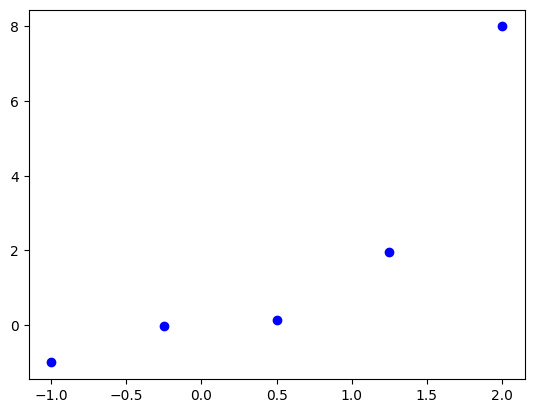

In [4]:
x = np.linspace(-1,2,5);
y = x**3
plt.plot(x,y,'bo')

In [8]:
f = interp.interp1d(x,y,kind="linear")
# 선형 보간 함수(linear interpolation function)**를 만듦.
# x, y 데이터로부터 보간기를 생성
# kind="linear" → 선형 보간 (점과 점 사이를 직선으로 연결)
# 이제 f(new_x)라고 호출하면, 그 구간 내에서 선형적으로 값을 계산해줌

In [6]:
type(f)

scipy.interpolate._interpolate.interp1d

In [7]:
f(0.2)

array(0.06875)

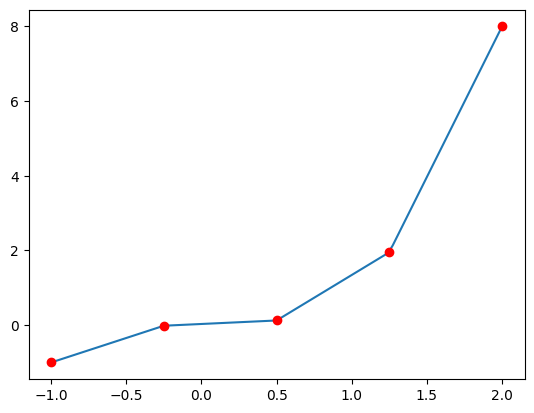

In [9]:
x_fine = np.linspace(-1,2,100)
plt.plot(x_fine,f(x_fine))
plt.plot(x,y,'ro')

각 점 사이의 간격 메꾸기

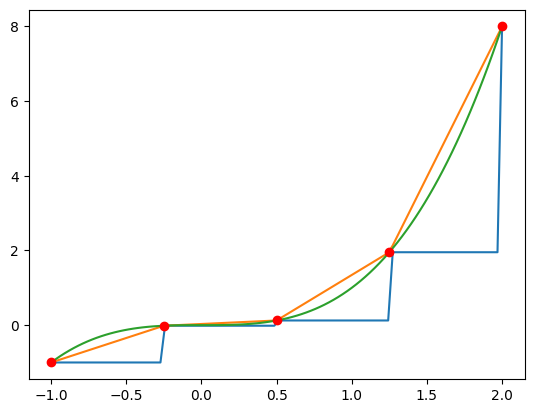

In [10]:
plt.plot(x_fine,interp.interp1d(x,y,kind="zero")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="linear")(x_fine))
plt.plot(x_fine,interp.interp1d(x,y,kind="cubic")(x_fine))
plt.plot(x,y,'ro')

In [11]:
interp.interp1d?

In [12]:
interp.interp2d?

## Optimization : `scipy.optimize`

Contains functions to find minima, roots and fit parameters

In [13]:
from scipy import optimize

In [14]:
def f(x):
    return x**4 -10*x**2

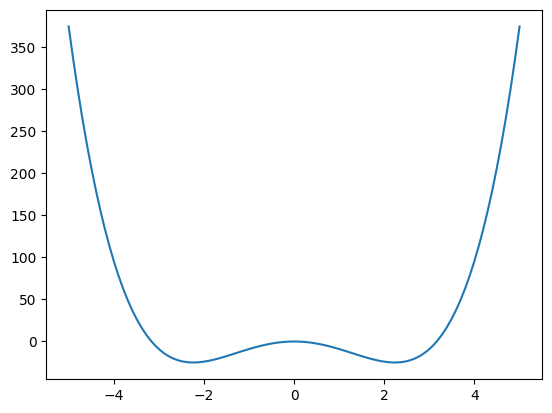

In [15]:
x = np.linspace(-5,5,100)
plt.plot(x,f(x));

In [17]:
results = optimize.minimize(f, 4)
results
# SciPy의 optimize.minimize 함수를 사용해서 함수 f를 최소화하는 x값을 찾는 과정입니다.
# f : 최소화할 대상 함수
# 4 : 초기값 (x=4 근처에서 탐색 시작)
# results : 최적화 결과를 담은 객체

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -24.99999999999999
        x: [ 2.236e+00]
      nit: 7
      jac: [ 1.431e-06]
 hess_inv: [[ 2.497e-02]]
     nfev: 16
     njev: 8

In [18]:
x_opt = results.x

함수의 minimize 값 지점 찾기

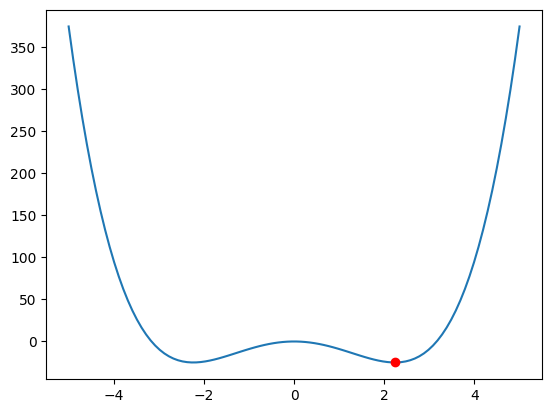

In [19]:
plt.plot(x,f(x));
plt.plot(x_opt,f(x_opt),'ro');

In [20]:
optimize.minimize?

In [21]:
def f(x):
    return x[0]*x[0] + x[1]*x[1] + 5*(np.sin(2*x[0]) + np.sin(2*x[1]) )

In [23]:
x=np.linspace(-5,5,100)
y=np.linspace(-5,5,100)
X,Y = np.meshgrid(x,y)
# ➡ x와 y 좌표값으로 **2차원 격자(grid)**를 생성.
# X: 각 행에 x값이 반복됨 (가로축 좌표들)
# Y: 각 열에 y값이 반복됨 (세로축 좌표들)
# 예를 들어, 작은 예시로 x=[1,2,3], y=[10,20]라면:

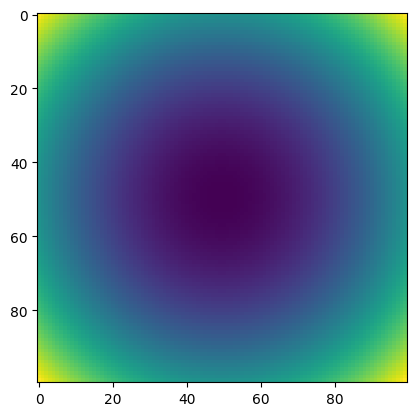

In [24]:
plt.imshow(X**2+Y**2)

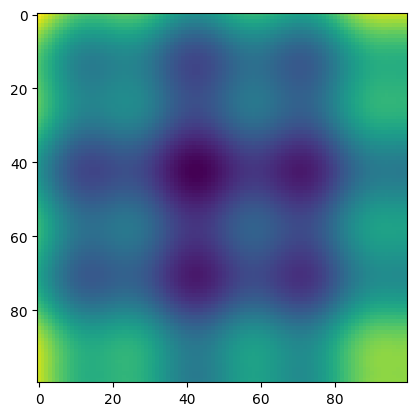

In [25]:
plt.imshow(f(np.array([X,Y])))

In [26]:
optimize.minimize(f,x0=[-1,1])

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: -4.399749751160588
        x: [-7.138e-01  2.136e+00]
      nit: 9
      jac: [-5.960e-08  5.960e-08]
 hess_inv: [[ 4.597e-02 -6.403e-07]
            [-6.403e-07  4.980e-02]]
     nfev: 42
     njev: 14

## Curve Fitting

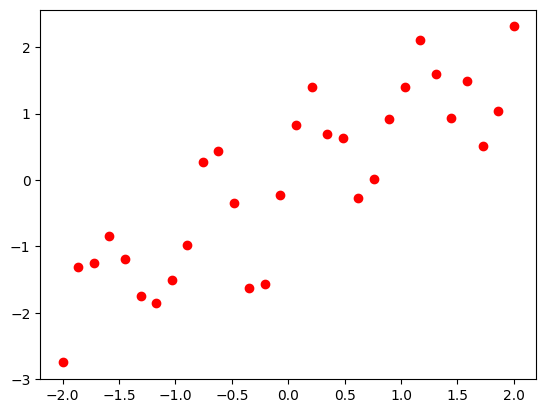

In [27]:
x = np.linspace(-2,2,30)
y = x+np.sin(6.5*x)+0.3*np.random.randn(30)
plt.plot(x,y,'ro')

In [28]:
def f(x,a,b):
    return a*x +b

In [30]:
((a,b),_) = optimize.curve_fit(f,x,y,(0,0))
# 즉, curve_fit은 모델이 데이터에 가장 잘 맞도록 파라미터를 조정하는 역할을 합니다.
# ➡ scipy.optimize.curve_fit를 사용해서 주어진 데이터 (x, y)에 함수 f를 맞추는(최적화) 과정입니다.
a,b

(np.float64(0.9207050835647785), np.float64(-0.02890727036380819))

In [31]:
optimize.curve_fit?

점 들 데이터를 기반으로 예측선 만들기


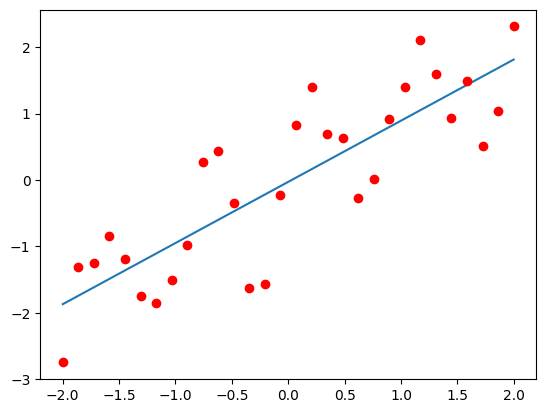

In [32]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,f(x_fine,a,b))
plt.plot(x,y,'ro')

In [33]:
def g(x,a,b):
    return a*x +b*np.sin(6.5*x)

In [34]:
((a,b),_) = optimize.curve_fit(g,x,y,(0,0))
a,b

(np.float64(0.9803010368805114), np.float64(0.9169235062620824))

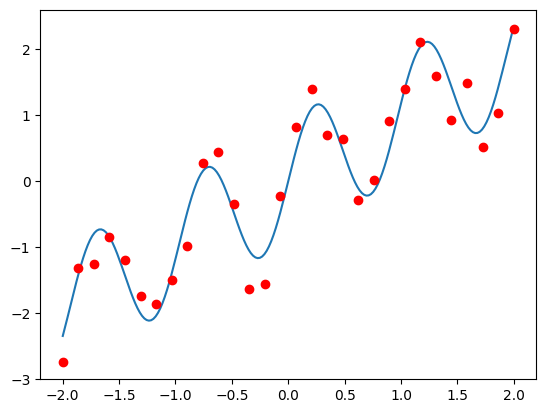

In [35]:
x_fine = np.linspace(-2,2,200)
plt.plot(x_fine,g(x_fine,a,b))
plt.plot(x,y,'ro')

### Root Finding

In [36]:
def f(x):
    return np.sin(x)

In [37]:
optimize.root(f,-1)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00]
       x: [ 0.000e+00]
  method: hybr
    nfev: 12
    fjac: [[-1.000e+00]]
       r: [-1.000e+00]
     qtf: [-5.740e-42]

## Linear programming
A very common case is linear programming (LP). These are optimization problems that can be written in the form

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^{T}x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$

Here, we are finding the vector $x$ that minimizes the dot product $c^T x$, where $c$ is some fixed vector, out of all $x$ that satisfy $A_{ub}x \leq b_{ub}$ and $A_{eq}x = b_{eq}$, where $A_{ub}$ and $A_{eq}$ are matrices and $b_{ub}$ and $b_{eq}$ are vectors.

## Exercise 6
Using Google and reading documentation are important parts of programming. `scipy.optimize` comes with specialized functions for solving linear programming problems.

Figure out how to solve LPs using `scipy.optimize`, and solve the following LP:
$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & x_1 + 2 x_2  \\
\text{subject to} \;\; & x_1 \leq 1 \\
& 5 x_1 + x_2 \geq 0
\end{split}
\end{equation}
$$

Note that the problem is equivalent to

$$
\begin{equation}
\begin{split}
\text{minimize} \;\; & c^T x  \\
\text{subject to} \;\; & A_{ub}x \leq b_{ub} \\
& A_{eq}x = b_{eq}
\end{split}
\end{equation}
$$
where
$$
c = \begin{pmatrix} 1 \\ 2 \end{pmatrix} \qquad
A_{ub} = \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix}, \qquad
b_{ub} = \begin{pmatrix} 1 \\ 0 \end{pmatrix}, \qquad
A_{eq} = 0, \qquad
b_{eq} = 0.
$$

We can see this because
$$
 \begin{pmatrix} 1 & 0 \\ -5 & -1 \end{pmatrix} \begin{pmatrix} x_1 \\ x_2 \end{pmatrix} = \begin{pmatrix} x_1 \\ -5x_1 - x_2 \end{pmatrix}
$$

## Statistics : `scipy.stats`

In [38]:
from scipy import stats

Find the maximum likelihood estimate for parameters

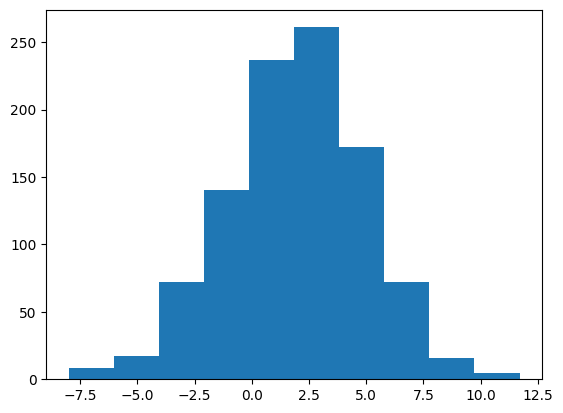

In [39]:
samples = 3*np.random.randn(1000)+2
plt.hist(samples);

In [47]:
stats.norm.fit(samples)
# ➡ scipy.stats를 사용해 정규분포 모수 추정
# norm.fit → 입력 데이터가 **평균(mu), 표준편차(sigma)**가 어떤 정규분포와 가장 잘 맞는지 계산
# 반환값: (mu_hat, sigma_hat)
# → 샘플 데이터 기반 **추정 평균과 표준편차**

(np.float64(1.9559959888268008), np.float64(3.0012221659589238))

In [44]:
a = np.random.randn(300)
b = np.random.randn(300) + 0.1

In [46]:
stats.ttest_ind(a,b)
# 두 독립 샘플 a와 b에 대해 독립표본 t-검정(t-test) 수행
# 귀무가설 : 두 그룹 평균이 같다
# 반환값: (t_statistic, p_value)
# t_statistic → t 값
# p_value → 두 그룹 평균 차이가 통계적으로 유의한지 확인

TtestResult(statistic=np.float64(-0.7951222148393455), pvalue=np.float64(0.42685788084586684), df=np.float64(598.0))

You can also perform kernel density estimation

---



In [48]:
x = np.concatenate(( 2*np.random.randn(1000)+5,  0.6*np.random.randn(1000)-1) )

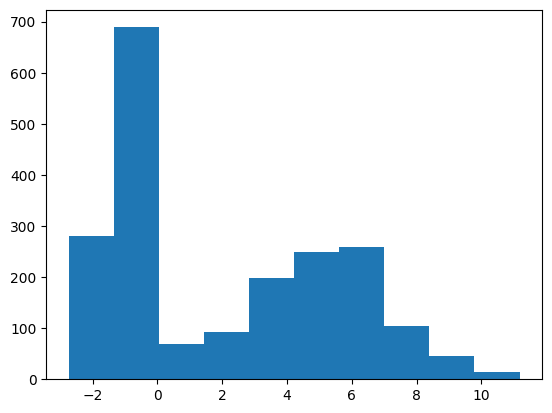

In [49]:
plt.hist(x);

In [53]:
pdf = stats.kde.gaussian_kde(x)
# 커널 밀도 추정(KDE, Kernel Density Estimate) 객체 생성


/tmp/ipython-input-1811637784.py:1: DeprecationWarning: Please import `gaussian_kde` from the `scipy.stats` namespace; the `scipy.stats.kde` namespace is deprecated and will be removed in SciPy 2.0.0.
  pdf = stats.kde.gaussian_kde(x)


In [54]:
type(pdf)

scipy.stats._kde.gaussian_kde

히스토그램 기반으로 그래프그리기 (KDE)

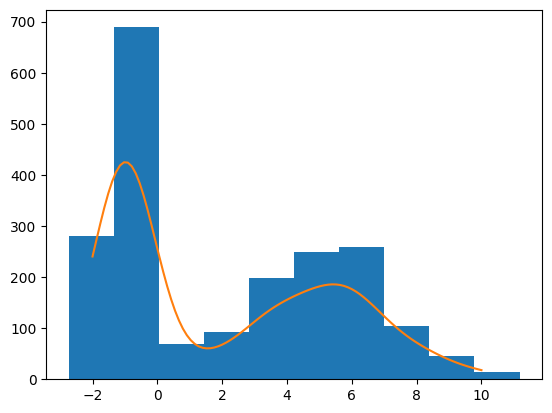

In [57]:
counts,bins,_ = plt.hist(x)
# ➡ 히스토그램을 그림
# counts → 각 막대(bin)에 들어있는 샘플 개수
# bins → 히스토그램 구간 경계 값
# _ → 막대 객체 (여기서는 사용 안 함)

x_fine=np.linspace(-2,10,100)
# ➡ 히스토그램 위에 그릴 세밀한 x 좌표 배열 생성
# -2에서 10까지 균등 100개 점

plt.plot(x_fine,np.sum(counts)*pdf(x_fine))
# pdf(x_fine) → 각 x_fine 위치에서 밀도 추정
# np.sum(counts) → 전체 샘플 수로 스케일링 (히스토그램 높이 맞춤)
# 결과: 히스토그램 위에 부드러운 KDE 곡선 그림

## Numerical Integration : `scipy.integrate`

In [58]:
import scipy.integrate as integ

적분


You can compute integral using the `quad` funtion

In [71]:
def f(x):
    return x**2 + 5*x + np.sin(x)

In [72]:
integ.quad(f,-1,1)
# 함수 f를 -1부터 1까지 적분하는 코드입니다.
# 결과는 왼쪽이 값, 오른쪽이 오차

(0.6666666666666667, 6.547013372677054e-14)

In [68]:
integ.quad?

You can also solve ODEs of the form
$$ \frac{dy}{dt} = f(y,t) $$

In [63]:
def f(y,t):
    return (y[1], -y[1]-9*y[0])

미분방정식 적분

In [69]:
t = np.linspace(0,10,100)
# ➡ SciPy의 odeint를 이용해 미분방정식(ODE) 적분 수행
# f : 미분방정식을 정의한 함수
# f(y, t) 형태로, y(t)의 미분(dy/dt)을 반환해야 함
# 여기서 y는 벡터일 수 있음 → [y1, y2]
Y = integ.odeint(f,[1,1],t)
# 반환값 Y : 각 시간 t에서의 y값을 담은 배열
# Y.shape = (len(t), len(y0))
# 예: 100×2 배열 → 100개의 시간 점마다 y1, y2 값

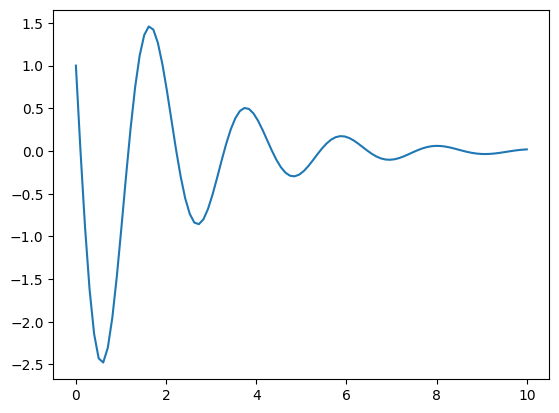

In [73]:
plt.plot(t,Y[:,1])
# t → x축 (시간)
# Y[:,1] → y축 (배열 Y의 두 번째 열, 즉 y2 값)
# : → 모든 행
# 1 → 두 번째 열 선택 (Python은 0-index)
# 즉, 시간에 따른 y2(t)의 변화를 시각화합니다.

## Physical simulation
Let's simulate a throwing a ball in two dimensions. The ball is described as a function of time by four functions: $x(t), y(t), v_x(t), v_y(t)$, which are governed by the ODE system:

$$
    \frac{dx}{dt} = v_x, \qquad
    \frac{dy}{dt} = v_y, \qquad
    \frac{dv_x}{dt} = 0, \qquad
    \frac{dv_y}{dt} = -g.
$$

We can think of this in vectorized form as:

$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ 0 \\ -g \end{pmatrix}
$$

In [74]:
def dzdt(z, t):
    x, y, vx, vy = z
    g = 1
    return np.array([vx, vy, 0, -g])

In [75]:
np.linspace(0, 50, 20)

array([ 0.        ,  2.63157895,  5.26315789,  7.89473684, 10.52631579,
       13.15789474, 15.78947368, 18.42105263, 21.05263158, 23.68421053,
       26.31578947, 28.94736842, 31.57894737, 34.21052632, 36.84210526,
       39.47368421, 42.10526316, 44.73684211, 47.36842105, 50.        ])

In [76]:
import matplotlib.pyplot as plt

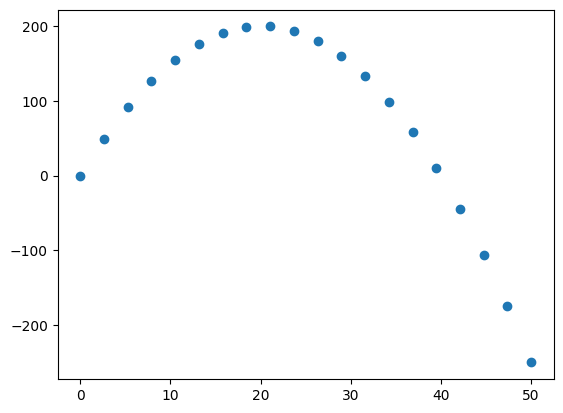

In [77]:
x, y = 0, 0
vx, vy = 1, 20
z = np.array([x, y, vx, vy])
t = np.linspace(0, 50, 20)

result = integ.odeint(dzdt, z, t)

plt.scatter(result[:, 0], result[:, 1])
plt.show()

## Exercise 7
We can add drag with the following slight modification to the ODE, which adds a force with direction opposing the current velocity, and with magnitude proportional to the velocity squared.
    
$$
    \frac{d}{dt} \begin{pmatrix} x \\ y \\ v_x \\ v_y \end{pmatrix} = \begin{pmatrix} v_x \\ v_y \\ -\alpha v_x \sqrt{v_x^2 + v_y^2} \\ -g -\alpha v_y \sqrt{v_x^2 + v_y^2} \end{pmatrix}
$$

Implement this with $\alpha = 0.001$, plot the resulting trajectory, and compare to the dragless case.

# Other useful packages

## `networkx`
Useful Package to handle graphs.

Install by running `conda install networkx`

그래프 라이브러리


In [78]:
import networkx as nx

In [79]:
G = nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(2,3)
G.add_edge(3,1)
G.add_edge(3,4)


In [80]:
nx.draw?

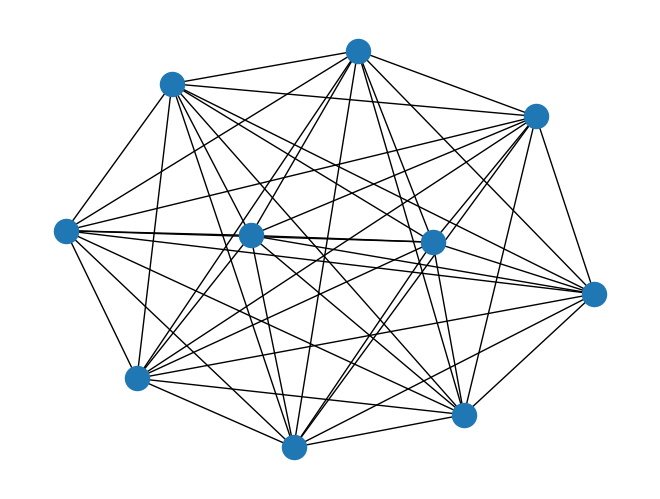

In [81]:
G = nx.complete_graph(10)
nx.draw(G)

## `sympy`

Package for performing symbolic computation and manipulation.

Install it in your environment by running `conda install sympy`

글꼴임

In [82]:
from sympy import *

In [83]:
x,y = symbols("x y")

In [84]:
x

x

In [85]:
expr = x+y**2

In [86]:
expr

x + y**2

In [87]:
# in colab run this to get latex output
# init_printing(use_latex='matplotlib')

In [88]:
x*expr

x*(x + y**2)

In [89]:
expand(x*expr)

x**2 + x*y**2

In [90]:
factor(x**2 -2*x*y + y**2)

(x - y)**2

In [91]:
latex(expr)

'x + y^{2}'

In [92]:
simplify( (x-y)**2 + (x+y)**2)

2*x**2 + 2*y**2

In [93]:
x**2/(y**3+y)

x**2/(y**3 + y)

In [94]:
(x**2/(y**3+y)).subs(y,1/(1+x)).simplify()

x**2*(x + 1)**4/(x + (x + 1)**3 + 1)

In [96]:
(x**2/(y**3+y)).evalf(subs={'x':2, 'y':4})

0.0588235294117647

In [97]:
Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [98]:
I = Integral(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

In [99]:
I.doit()

pi

In [100]:
(sin(x)/(1+cos(x)))

sin(x)/(cos(x) + 1)

In [101]:
(sin(x)/(1+cos(x))).series(x,0,10)

x/2 + x**3/24 + x**5/240 + 17*x**7/40320 + 31*x**9/725760 + O(x**10)

## Extra Exercises
The following exercises requires the combined usage of the packages we learnt today.

1. Generate 10 random polynomials of order 5
    - Numerically and analytically integrate them from 0 to 1 and compare the answers.
    - Compute one minima for each polynomial and show that the analytically computed derivative is 0 at the minima
    - Randomly sample the polynomials in the range from 0 to 1, and see if you can recover the original coefficents by trying to fit a 5th order polynomial to the samples.
2. Read and learn about [Erdos-Renyi Random Graphs](https://en.wikipedia.org/wiki/Erd%C5%91s%E2%80%93R%C3%A9nyi_model). See if you can numerically verify some of the properties mentioned in the wiki, such as for what parameter values is the graph most likely connected.